In [2]:
import sys
sys.path.insert(0, '..')

from ComputeC import computeC
from Process_gene_data import process_gene_data
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
from matplotlib.ticker import FixedLocator
from matplotlib.lines import Line2D

In [ ]:
filename = '/Users/gyh/Documents/github/TCCN/Gene_Data/Figure_5.txt'
arrays, gene_dict = process_gene_data(filename)
print(arrays)
print(gene_dict)

[[1, 3, 5, 6, 7], [1, 2], [3, 5, 7], [3, 4, 5, 6, 7], [3, 4, 5, 7], [5, 6, 7]]
{1: 503, 2: 2511, 3: 656, 4: 102, 5: 306, 6: 174, 7: 82}


1.0975234551921011 0.010724953802404484


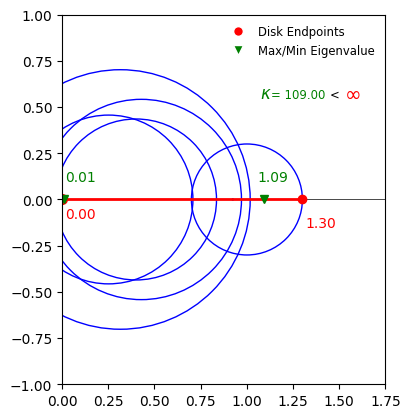

In [33]:
readlengh = 400

matrix = computeC(arrays, readlengh, gene_dict).T @ computeC(arrays, readlengh, gene_dict)
eigenvalues, eigenvectors = np.linalg.eig(computeC(arrays, readlengh, gene_dict).T @ computeC(arrays, readlengh, gene_dict))
print(max(eigenvalues), min(eigenvalues))
n = len(matrix)
fig, ax = plt.subplots(dpi = 100)

x_max = float('-inf')
x_min = float('inf')

max_cond = 1.09
min_cond = 0.01

for i in range(n):
    # Get diagonal element as the x-coordinate of circle center
    center_x = matrix[i][i]
    
    # y-coordinate is 0
    center_y = 0
    
    # Calculate radius
    radius = sum(matrix[i]) - center_x
    
    # Draw circle
    circle = plt.Circle((center_x, center_y), radius, fill=False, color='blue')
    ax.add_artist(circle)
    
    # Mark circle center
    # ax.plot(center_x, center_y, 'ro')
    
    # Update max and min x values
    x_max = max(x_max, center_x + radius)
    x_min = min(x_min, center_x - radius)

# Set axis range
ax.set_xlim(0, 1.75)
ax.set_ylim(-1, 1)

# Draw x-axis
ax.axhline(0, color='black', linewidth=0.5)

# Mark min and max x points and connect them with red line
ax.plot([x_min, x_max], [0, 0], 'r-', linewidth=2)

# Mark min and max x values
ax.plot(0.00, 0, 'ro', markersize=7)
ax.plot(x_max, 0, 'ro')

# Label min and max x values
ax.text(0.1, -0.1, f'{0.00:.2f}', color='red', ha='center')
ax.text(x_max+0.1, -0.15, f'{x_max:.2f}', color='red', ha='center')

# Mark min and max eigenvalues
ax.plot(min_cond, 0, marker='v', color='green')
ax.plot(max_cond,0,  marker='v', color='green')

# Label min and max eigenvalues
ax.text(0.1, 0.1, f'{min_cond:.2f}', color='green', ha='center')
ax.text(max_cond+0.05, 0.1, f'{max_cond:.2f}', color='green', ha='center')

# Add legend
red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=7, label='Disk Endpoints')
green_triangle = plt.Line2D([0], [0], marker='v', color='w', markerfacecolor='g', markersize=7, label='Max/Min Eigenvalue')
ax.legend(handles=[red_dot, green_triangle], loc='upper right', frameon=False, fontsize='small')

# Calculate ratios
ratio_eigenvalues = max(eigenvalues) / min(eigenvalues)
ratio_endpoints = x_max / x_min

# Check for infinity values
ratio_eigenvalues_text = '∞' if np.isinf(ratio_eigenvalues) else f'{ratio_eigenvalues:.2f}'
ratio_endpoints_text = '∞' 

# Set matplotlib to use LaTeX fonts
# plt.rcParams['text.usetex'] = True

# Display Greek letters (requires LaTeX support)
plt.rcParams['text.usetex'] = False
plt.text(1.07, 0.55, r'$\kappa$', color='green', fontsize='large')
plt.rcParams['text.usetex'] = False
plt.text(1.13, 0.55, f'= {109:.2f}', color='green', fontsize = 'small')

plt.text(1.45, 0.55, f'<', fontsize='small', color='black')
plt.text(1.53, 0.54, '∞' , fontsize='x-large', color='red')


plt.gca().set_aspect('equal', adjustable='box')
plt.show()

1.0 0.08535734717731239


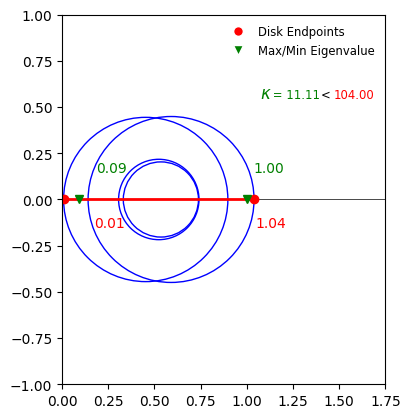

In [28]:
readlengh = 600

matrix = computeC(arrays, readlengh, gene_dict).T @ computeC(arrays, readlengh, gene_dict)
eigenvalues, eigenvectors = np.linalg.eig(computeC(arrays, readlengh, gene_dict).T @ computeC(arrays, readlengh, gene_dict))
print(max(eigenvalues), min(eigenvalues))
n = len(matrix)
fig, ax = plt.subplots(dpi = 100)

x_max = float('-inf')
x_min = float('inf')

max_cond = 1.00
min_cond = 0.09

for i in range(n):
    # Get diagonal element as the x-coordinate of circle center
    center_x = matrix[i][i]
    
    # y-coordinate is 0
    center_y = 0
    
    # Calculate radius
    radius = sum(matrix[i]) - center_x
    
    # Draw circle
    circle = plt.Circle((center_x, center_y), radius, fill=False, color='blue')
    ax.add_artist(circle)
    
    # Mark circle center
    # ax.plot(center_x, center_y, 'ro')
    
    # Update max and min x values
    x_max = max(x_max, center_x + radius)
    x_min = min(x_min, center_x - radius)

# Set axis range
ax.set_xlim(0, 1.75)
ax.set_ylim(-1, 1)

# Draw x-axis
ax.axhline(0, color='black', linewidth=0.5)

# Mark min and max x points and connect them with red line
ax.plot([x_min, x_max], [0, 0], 'r-', linewidth=2)

# Mark min and max x values
ax.plot(x_min, 0, 'ro')
ax.plot(x_max, 0, 'ro')

# Label min and max x values
ax.text(x_min+0.25, -0.15, f'{x_min:.2f}', color='red', ha='center')
ax.text(x_max+0.09, -0.15, f'{x_max:.2f}', color='red', ha='center')

# Mark min and max eigenvalues
ax.plot(min_cond, 0, marker='v', color='green')
ax.plot(max_cond, 0,  marker='v', color='green')

# Label min and max eigenvalues
ax.text(min_cond+0.18, 0.15, f'{min_cond:.2f}', color='green', ha='center')
ax.text(max_cond+0.12, 0.15, f'{max_cond:.2f}', color='green', ha='center')

# Add legend
red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=7, label='Disk Endpoints')
green_triangle = plt.Line2D([0], [0], marker='v', color='w', markerfacecolor='g', markersize=7, label='Max/Min Eigenvalue')
ax.legend(handles=[red_dot, green_triangle], loc='upper right', frameon=False, fontsize='small')

# Calculate ratios
ratio_eigenvalues = max_cond / min_cond
ratio_endpoints = x_max / x_min

# Check for infinity values
ratio_eigenvalues_text = '∞' if np.isinf(ratio_eigenvalues) else f'{ratio_eigenvalues:.2f}'
ratio_endpoints_text = ratio_endpoints 

plt.rcParams['text.usetex'] = False
plt.text(1.07, 0.55, r'$\kappa$', color='green', fontsize='large')
plt.rcParams['text.usetex'] = False

plt.text(1.12, 0.55, f' = {ratio_eigenvalues:.2f}', fontsize='small', color='green')
plt.text(1.40, 0.55, f'<', fontsize='small', color='black')
plt.text(1.47, 0.55, f'{104:.2f}' , fontsize='small', color='red')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

1.0 0.17500485568253016


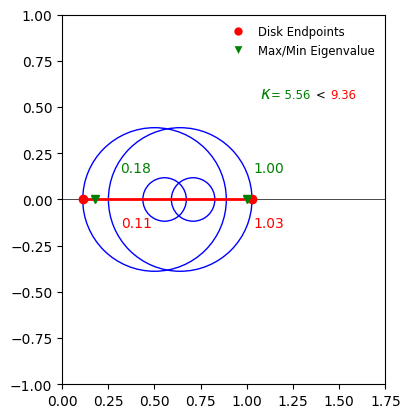

In [26]:
readlengh = 800

matrix = computeC(arrays, readlengh, gene_dict).T @ computeC(arrays, readlengh, gene_dict)
eigenvalues, eigenvectors = np.linalg.eig(computeC(arrays, readlengh, gene_dict).T @ computeC(arrays, readlengh, gene_dict))
print(max(eigenvalues), min(eigenvalues))
n = len(matrix)
fig, ax = plt.subplots(dpi = 100)

x_max = float('-inf')
x_min = float('inf')

max_cond = 1.00
min_cond = 0.18

for i in range(n):
    # Get diagonal element as the x-coordinate of circle center
    center_x = matrix[i][i]
    
    # y-coordinate is 0
    center_y = 0
    
    # Calculate radius
    radius = sum(matrix[i]) - center_x
    
    # Draw circle
    circle = plt.Circle((center_x, center_y), radius, fill=False, color='blue')
    ax.add_artist(circle)
    
    # Mark circle center
    # ax.plot(center_x, center_y, 'ro')
    
    # Update max and min x values
    x_max = max(x_max, center_x + radius)
    x_min = min(x_min, center_x - radius)

# Set axis range
ax.set_xlim(0, 1.75)
ax.set_ylim(-1, 1)

# Draw x-axis
ax.axhline(0, color='black', linewidth=0.5)

# Mark min and max x points and connect them with red line
ax.plot([x_min, x_max], [0, 0], 'r-', linewidth=2)

# Mark min and max x values
ax.plot(x_min, 0, 'ro')
ax.plot(x_max, 0, 'ro')

# Label min and max x values
ax.text(x_min+0.29, -0.15, f'{x_min:.2f}', color='red', ha='center')
ax.text(x_max+0.09, -0.15, f'{x_max:.2f}', color='red', ha='center')

# Mark min and max eigenvalues
ax.plot(min_cond, 0, marker='v', color='green')
ax.plot(max_cond, 0,  marker='v', color='green')

# Label min and max eigenvalues
ax.text(min_cond+0.22, 0.15, f'{min_cond:.2f}', color='green', ha='center')
ax.text(max_cond+0.12, 0.15, f'{max_cond:.2f}', color='green', ha='center')

# Add legend
red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=7, label='Disk Endpoints')
green_triangle = plt.Line2D([0], [0], marker='v', color='w', markerfacecolor='g', markersize=7, label='Max/Min Eigenvalue')
ax.legend(handles=[red_dot, green_triangle], loc='upper right', frameon=False, fontsize='small')

# Calculate ratios
ratio_eigenvalues = max_cond / min_cond
ratio_endpoints = x_max / x_min

# Check for infinity values
ratio_eigenvalues_text = '∞' if np.isinf(ratio_eigenvalues) else f'{ratio_eigenvalues:.2f}'
ratio_endpoints_text = ratio_endpoints 

plt.rcParams['text.usetex'] = False
plt.text(1.07, 0.55, r'$\kappa$', color='green', fontsize='large')
plt.rcParams['text.usetex'] = False

plt.text(1.13, 0.55, f'= {ratio_eigenvalues:.2f}', fontsize='small', color='green')
plt.text(1.37, 0.55, f'<', fontsize='small', color='black')
plt.text(1.45, 0.55, f'{9.36:.2f}' , fontsize='small', color='red')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

1.0 0.46828084951660737


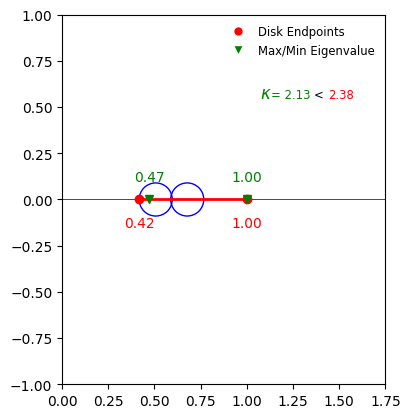

In [27]:
readlengh = 1000

matrix = computeC(arrays, readlengh, gene_dict).T @ computeC(arrays, readlengh, gene_dict)
eigenvalues, eigenvectors = np.linalg.eig(computeC(arrays, readlengh, gene_dict).T @ computeC(arrays, readlengh, gene_dict))
print(max(eigenvalues), min(eigenvalues))
n = len(matrix)
fig, ax = plt.subplots(dpi = 100)

x_max = float('-inf')
x_min = float('inf')

max_cond = 1.0
min_cond = 0.47

for i in range(n):
    # Get diagonal element as the x-coordinate of circle center
    center_x = matrix[i][i]
    
    # y-coordinate is 0
    center_y = 0
    
    # Calculate radius
    radius = sum(matrix[i]) - center_x
    
    # Draw circle
    circle = plt.Circle((center_x, center_y), radius, fill=False, color='blue')
    ax.add_artist(circle)
    
    # Mark circle center
    # ax.plot(center_x, center_y, 'ro')
    
    # Update max and min x values
    x_max = max(x_max, center_x + radius)
    x_min = min(x_min, center_x - radius)

# Set axis range
ax.set_xlim(0, 1.75)
ax.set_ylim(-1, 1)

# Draw x-axis
ax.axhline(0, color='black', linewidth=0.5)

# Mark min and max x points and connect them with red line
ax.plot([x_min, x_max], [0, 0], 'r-', linewidth=2)

# Mark min and max x values
ax.plot(x_min, 0, 'ro')
ax.plot(x_max, 0, 'ro')

# Label min and max x values
ax.text(x_min, -0.15, f'{x_min:.2f}', color='red', ha='center')
ax.text(x_max, -0.15, f'{x_max:.2f}', color='red', ha='center')

# Mark min and max eigenvalues
ax.plot(min_cond, 0, marker='v', color='green')
ax.plot(max_cond, 0,  marker='v', color='green')

# Label min and max eigenvalues
ax.text(min_cond, 0.1, f'{min_cond:.2f}', color='green', ha='center')
ax.text(max_cond, 0.1, f'{max_cond:.2f}', color='green', ha='center')

# Add legend
red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=7, label='Disk Endpoints')
green_triangle = plt.Line2D([0], [0], marker='v', color='w', markerfacecolor='g', markersize=7, label='Max/Min Eigenvalue')
ax.legend(handles=[red_dot, green_triangle], loc='upper right', frameon=False, fontsize='small')

# Calculate ratios
ratio_eigenvalues = max_cond / min_cond
ratio_endpoints = x_max / x_min

# Check for infinity values
ratio_eigenvalues_text = '∞' if np.isinf(ratio_eigenvalues) else f'{ratio_eigenvalues:.2f}'
ratio_endpoints_text = ratio_endpoints 

plt.rcParams['text.usetex'] = False
plt.text(1.07, 0.55, r'$\kappa$', color='green', fontsize='large')
plt.rcParams['text.usetex'] = False

plt.text(1.13, 0.55, f'= {2.13:.2f}', fontsize='small', color='green')

plt.text(1.36, 0.55, f'<', fontsize='small', color='black')
plt.text(1.44, 0.55, f'{2.38:.2f}' , fontsize='small', color='red')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

1.0 1.0


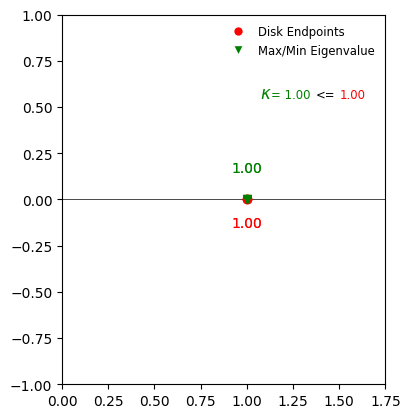

In [24]:
readlengh = 1200

matrix = computeC(arrays, readlengh, gene_dict).T @ computeC(arrays, readlengh, gene_dict)
eigenvalues, eigenvectors = np.linalg.eig(computeC(arrays, readlengh, gene_dict).T @ computeC(arrays, readlengh, gene_dict))
print(max(eigenvalues), min(eigenvalues))
n = len(matrix)
fig, ax = plt.subplots(dpi = 100)

x_max = float('-inf')
x_min = float('inf')

max_cond = 1.00
min_cond = 1.00

for i in range(n):
    # Get diagonal element as the x-coordinate of circle center
    center_x = matrix[i][i]
    
    # y-coordinate is 0
    center_y = 0
    
    # Calculate radius
    radius = sum(matrix[i]) - center_x
    
    # Draw circle
    circle = plt.Circle((center_x, center_y), radius, fill=False, color='blue')
    ax.add_artist(circle)
    
    # Mark circle center
    # ax.plot(center_x, center_y, 'ro')
    
    # Update max and min x values
    x_max = max(x_max, center_x + radius)
    x_min = min(x_min, center_x - radius)

# Set axis range
ax.set_xlim(0, 1.75)
ax.set_ylim(-1, 1)

# Draw x-axis
ax.axhline(0, color='black', linewidth=0.5)

# Mark min and max x points and connect them with red line
ax.plot([x_min, x_max], [0, 0], 'r-', linewidth=2)

# Mark min and max x values
ax.plot(x_min, 0, 'ro')
ax.plot(x_max, 0, 'ro')

# Label min and max x values
ax.text(x_min, -0.15, f'{x_min:.2f}', color='red', ha='center')
ax.text(x_max, -0.15, f'{x_max:.2f}', color='red', ha='center')

# Mark min and max eigenvalues
ax.plot(min_cond, 0, marker='v', color='green')
ax.plot(max_cond, 0,  marker='v', color='green')

# Label min and max eigenvalues
ax.text(min_cond, 0.15, f'{min_cond:.2f}', color='green', ha='center')
ax.text(max_cond, 0.15, f'{max_cond:.2f}', color='green', ha='center')

# Add legend
red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=7, label='Disk Endpoints')
green_triangle = plt.Line2D([0], [0], marker='v', color='w', markerfacecolor='g', markersize=7, label='Max/Min Eigenvalue')
ax.legend(handles=[red_dot, green_triangle], loc='upper right', frameon=False, fontsize='small')

# Calculate ratios
ratio_eigenvalues = max_cond / min_cond
ratio_endpoints = x_max / x_min

# Check for infinity values
ratio_eigenvalues_text = '∞' if np.isinf(ratio_eigenvalues) else f'{ratio_eigenvalues:.2f}'
ratio_endpoints_text = ratio_endpoints 

plt.rcParams['text.usetex'] = False
plt.text(1.07, 0.55, r'$\kappa$', color='green', fontsize='large')
plt.rcParams['text.usetex'] = False

plt.text(1.13, 0.55, f'= {ratio_eigenvalues:.2f}', fontsize='small', color='green')
plt.text(1.37, 0.55, f'<=', fontsize='small', color='black')
plt.text(1.50, 0.55, f'{ratio_endpoints_text:.2f}' , fontsize='small', color='red')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

400
600
800
1000
1200


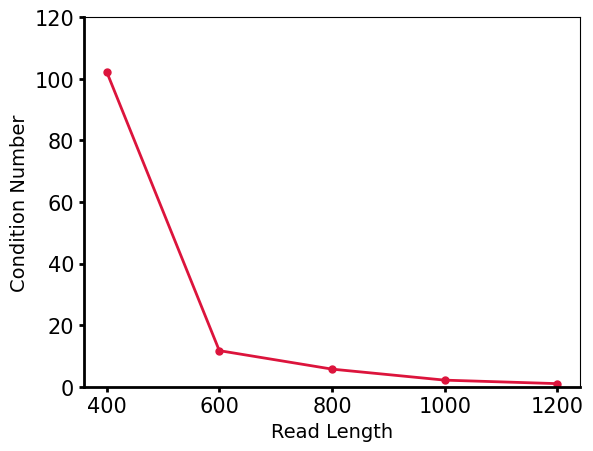

In [23]:
# Calculate condition number for different readlengh values
sums = [sum(gene_dict[key] for key in sublist) for sublist in arrays]
max_sum = max(sums)
max_readlengh = max_sum
maxc = []
k = 0

# Generate readlengh range
readlengh_range = np.linspace(400, 1200,  5, endpoint=True, dtype=int)

for readlengh in readlengh_range:
    print(readlengh)
    C = computeC(arrays, readlengh, gene_dict)
    eigenvalues, eigenvectors = np.linalg.eig(C.T @ C)
    max_element = max(eigenvalues)/min(eigenvalues)
    #max_element = np.log10(max_element)
    maxc.append(max_element)

# Create main plot
fig, ax1 = plt.subplots(dpi = 100)
fig.set_size_inches(3840.0/600, 2880/600)
fig=plt.gcf()

readlengh_range = np.linspace(400, 1200,  5, endpoint=True, dtype=int)

# Plot the first set of data (needs truncation handling)
line1, = ax1.plot(readlengh_range, maxc, 'o-', markersize=5,color = 'crimson', label='Condition Number', linewidth=2)
#ax1.set_ylim(0, 20)
ax1.set_xlabel('Read Length', fontsize=14)
ax1.set_ylabel('Condition Number', fontsize=14)

# Set y-axis range
ax1.set_ylim(0, 120)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.tick_params(axis='x', width=2, colors='black', labelsize=15, labelcolor='black')
ax1.tick_params(axis='y', width=2, colors='black', labelsize=15, labelcolor='black')

# Display the plot
plt.show()